## Exploratory data analysis

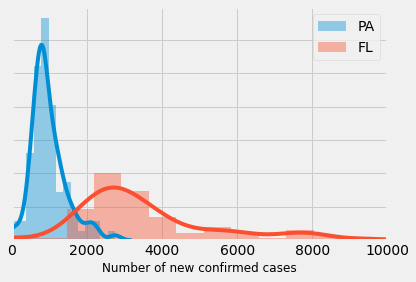

In [32]:

dailyCasesStates = pd.read_csv("https://api.covidtracking.com/v1/states/daily.csv")

casesInFL = dailyCasesStates.loc[ (dailyCasesStates.state=="FL") & (dailyCasesStates.date>=20200801) , :]
casesInPA = dailyCasesStates.loc[ (dailyCasesStates.state=="PA") & (dailyCasesStates.date>=20200801), :]

plt.style.use("fivethirtyeight")

fig,ax = plt.subplots()

sns.distplot( casesInPA.positiveIncrease, label ="PA" )
sns.distplot( casesInFL.positiveIncrease, label = "FL" )

ax.set_xlabel("Number of new confirmed cases",fontsize=12)
ax.set_yticklabels([])

ax.set_xlim(0,10000)
ax.legend()

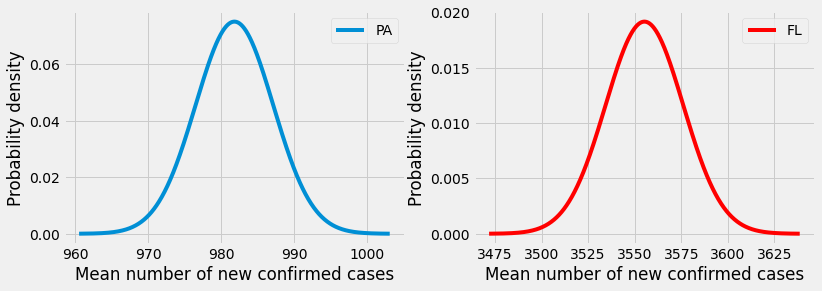

In [33]:
#CLT
import scipy.stats

meanPA = np.mean(casesInPA.positiveIncrease)
sePA = np.std(casesInPA.positiveIncrease)/len(casesInPA)

meanFL = np.mean(casesInFL.positiveIncrease)
seFL = np.std(casesInFL.positiveIncrease)/len(casesInFL)


meanDistPA = scipy.stats.norm(meanPA, sePA).pdf
meanDistFL = scipy.stats.norm(meanFL, seFL).pdf

fig,axs = plt.subplots(1,2)

ax = axs[0]
domain = np.linspace(meanPA-4*sePA,meanPA+4*sePA,1000)
ax.plot( domain, meanDistPA(domain), label = "PA"  )

ax.legend()
ax.set_xlabel("Mean number of new confirmed cases")
ax.set_ylabel("Probability density")


ax = axs[1]
domain = np.linspace(meanFL-4*seFL,meanFL+4*seFL,1000)
ax.plot( domain, meanDistFL(domain), label = "FL",color="red"  )

ax.legend()
ax.set_xlabel("Mean number of new confirmed cases")
ax.set_ylabel("Probability density")

fig.set_size_inches(12,4)

## T-test for two samples



In [53]:
testStat, pvalue = scipy.stats.ttest_ind( casesInPA.positiveIncrease, casesInFL.positiveIncrease, equal_var=False)
print("Pvalue = {:.3f}".format(pvalue))

Pvalue = 0.000


### Have states observed an increase in one week of the number of new cases? (Paired t-test)




Mean Change 223.89
SE Change 46.80
T = 4.78
4.7412972708489916


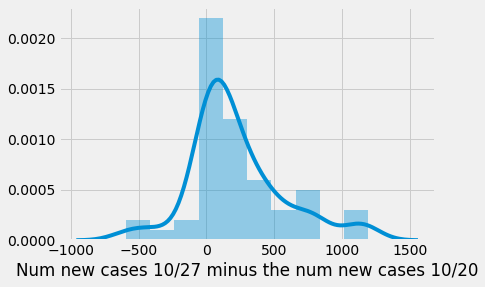

In [69]:
changeFromOneweekAgo = []

for state in dailyCasesStates.state.unique():
    lastWeek = dailyCasesStates.loc[ (dailyCasesStates.state==state) & (dailyCasesStates.date==20201020),:]
    thisWeek = dailyCasesStates.loc[ (dailyCasesStates.state==state) & (dailyCasesStates.date==20201027),:]
    
    change = float(thisWeek.positiveIncrease.values - lastWeek.positiveIncrease.values)
    changeFromOneweekAgo.append(change)

fig,ax = plt.subplots()
sns.distplot(changeFromOneweekAgo)

ax.set_xlabel("Num new cases 10/27 minus the num new cases 10/20")

meanChange = np.mean(changeFromOneweekAgo)
se = np.std(changeFromOneweekAgo)/ np.sqrt(len(changeFromOneweekAgo))

print("Mean Change {:.2f}".format(meanChange))
print("SE Change {:.2f}".format(se))

print("T = {:.2f}".format( meanChange/se ))

ttest, pvalue = scipy.stats.ttest_1samp( changeFromOneweekAgo, 0 )